## Scatter Plots

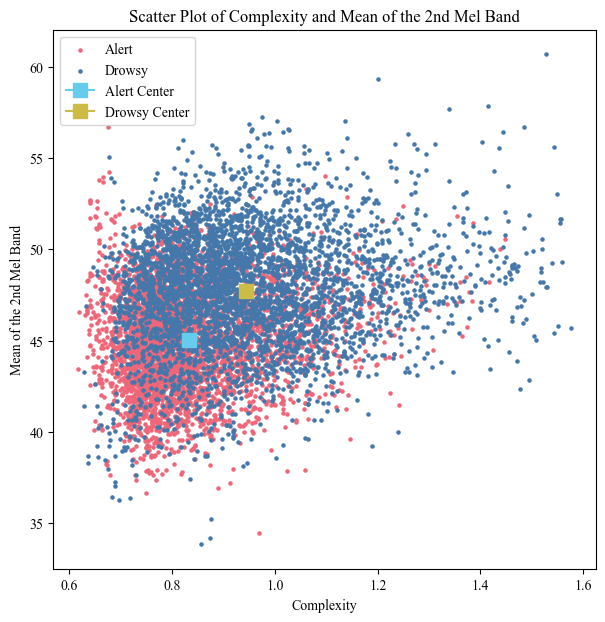

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import utils, constants
plt.rcParams["font.family"] = "Times New Roman"
dataset = utils.data_loader(path = constants.MAIN_CSV_FILE)
reduced_dataset = utils.channel_selection(dataset, constants.SELECTED_CHANNELS)

f1 = 'complexity'
f2 = 'mel_2'

# Example data
feature1 = reduced_dataset[f1]
feature2 = reduced_dataset[f2]
labels = reduced_dataset['label']
plt.rcParams["figure.figsize"] = [7, 7]
# Separate data based on labels
x0 = [feature1[i] for i in labels.index if labels[i] == 0]
y0 = [feature2[i] for i in labels.index if labels[i] == 0]
x1 = [feature1[i] for i in labels.index if labels[i] == 1]
y1 = [feature2[i] for i in labels.index if labels[i] == 1]

# Create scatter plot
plt.scatter(x0, y0, color='#EE6677', label='Alert', s  = 5)
plt.scatter(x1, y1, color='#4477AA', label='Drowsy', s  = 5)
plt.plot(np.mean(x0), np.mean(y0), color='#66CCEE', label='Alert Center', marker='s', markersize=10)
plt.plot(np.mean(x1), np.mean(y1), color='#ccbb44', label='Drowsy Center', marker='s', markersize=10)
# Set labels and title
plt.xlabel('Complexity')
plt.ylabel('Mean of the 2nd Mel Band')
plt.title('Scatter Plot of Complexity and Mean of the 2nd Mel Band'.format(f1, f2))

# Add legend
plt.legend()

# Show the plot
plt.savefig('outs/scatter/{} and {} class scatter.pdf'.format(f1, f2), bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
X = data[0]
y = np.array(data[2]).flatten()
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (8088 * 0.8, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

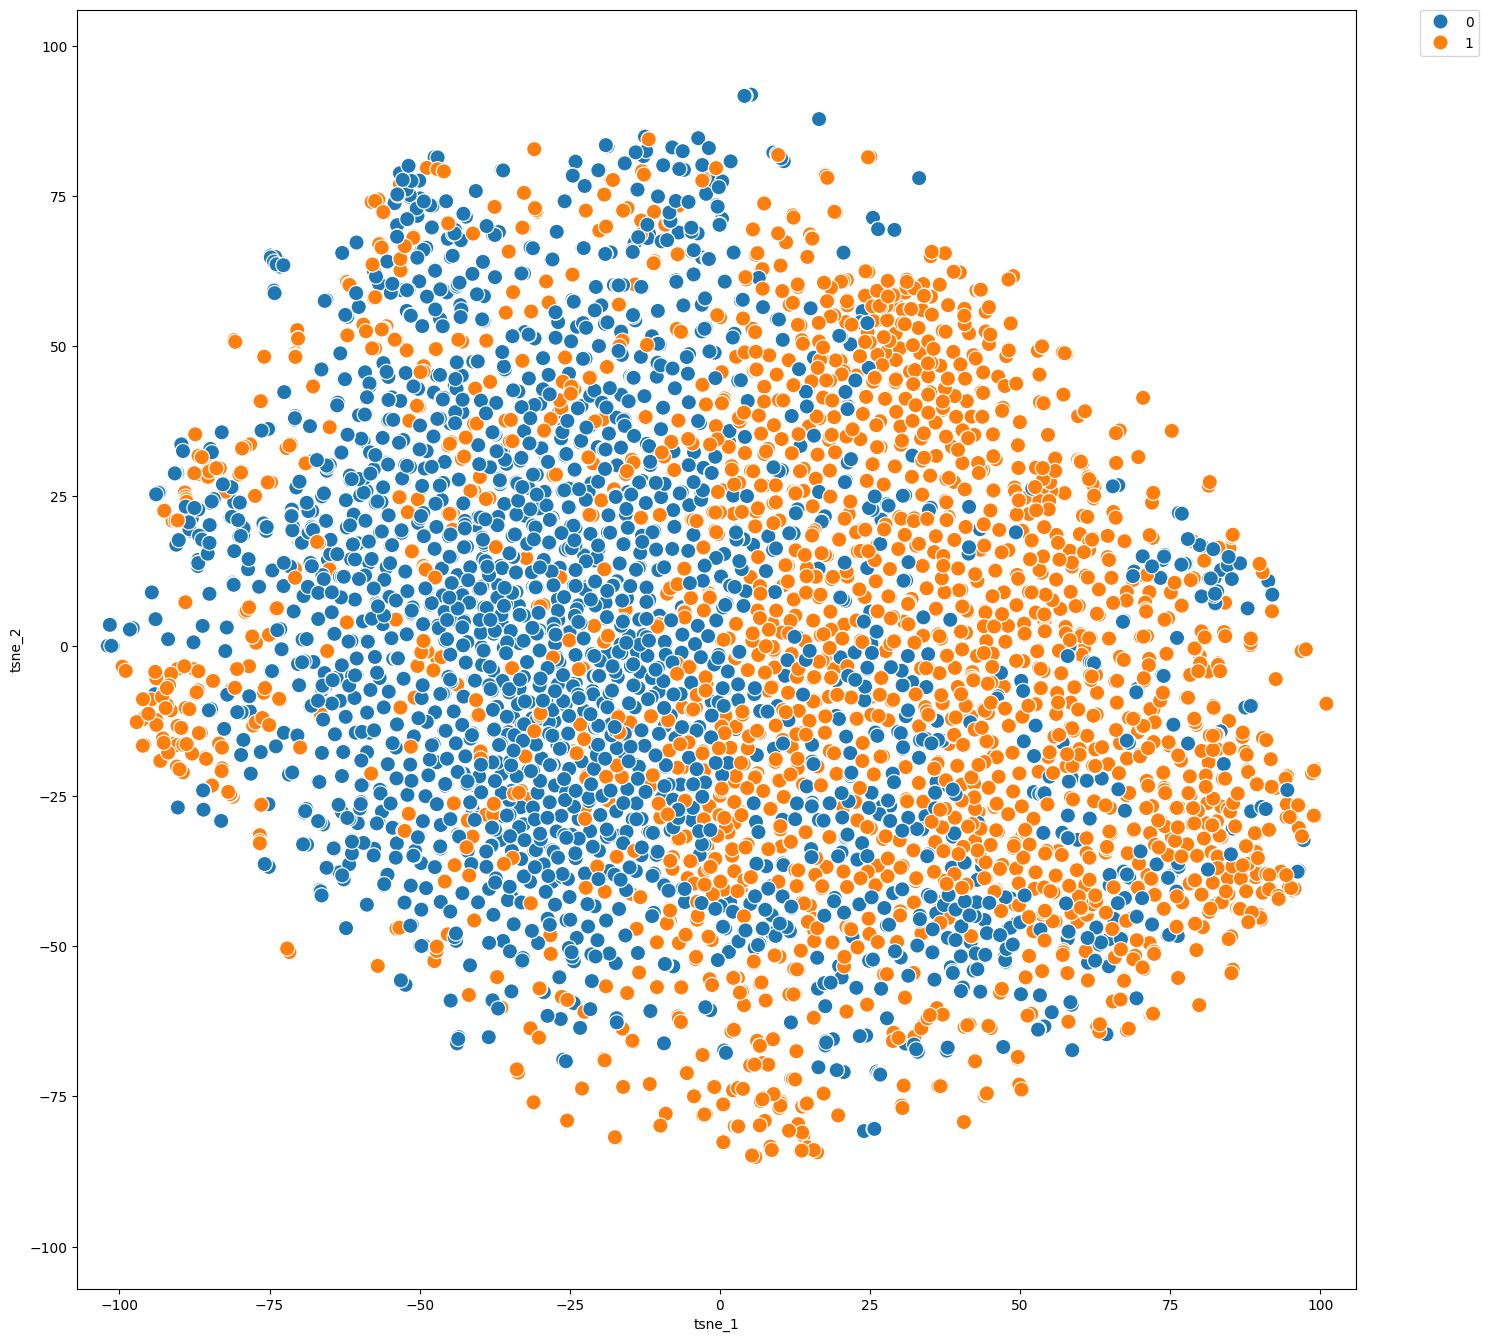

In [ ]:
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## Feature Number Plots

In [1]:
import utils, selection, training, constants

dataset = utils.data_loader(constants.MAIN_CSV_FILE)
reduced_dataset = utils.channel_selection(dataset, channel_list=constants.SELECTED_CHANNELS)
chi_sorted = ['complexity', 'alpha_power', 'energy_mel_4', 'energy_mel_2', 'energy_mel_5', 'spc_roff', 'mel_4', 'energy_mel_3', 'mel_2', 'mel_3', 'energy_mel_1', 'mel_5', 'spc_cnt', 'gamma_beta', 'mel_1', 'theta_power', 'rms', 'beta_alpha', 'gamma_alpha', 'alpha_delta', 'mfcc_8', 'mobility', 'mfcc_2', 'energy_mel_0', 'mel_0', 'mfcc_3', 'mfcc_6', 'alpha_theta', 'mfcc_0', 'gamma_theta', 'delta_power', 'mean_abs_sec_dif', 'zc', 'mfcc_1', 'gamma_delta', 'activity', 'dfa', 'mfcc_5', 'beta_theta', 'theta_delta', 'mfcc_4', 'beta_power', 'mfcc_7', 'gamma_power', 'mfcc_9', 'skew', 'slope', 'beta_delta', 'kurtosis']
anova_sorted = ['energy_mel_2', 'mel_2', 'mel_3', 'energy_mel_1', 'energy_mel_3', 'energy_mel_4', 'mel_1', 'mel_4', 'spc_roff', 'complexity', 'energy_mel_5', 'mel_5', 'rms', 'spc_cnt', 'alpha_power', 'theta_power', 'mfcc_8', 'mfcc_2', 'gamma_beta', 'mel_0', 'energy_mel_0', 'mfcc_3', 'mobility', 'mfcc_0', 'mfcc_6', 'zc', 'dfa', 'mean_abs_sec_dif', 'beta_alpha', 'alpha_delta', 'mfcc_1', 'gamma_alpha', 'delta_power', 'alpha_theta', 'gamma_theta', 'activity', 'mfcc_5', 'gamma_delta', 'mfcc_4', 'beta_theta', 'skew', 'beta_power', 'theta_delta', 'mfcc_7', 'slope', 'mfcc_9', 'gamma_power', 'beta_delta', 'kurtosis']
#utils.incremental_training(dataset, channel_list=constants.SELECTED_CHANNELS, feature_subset=chi_sorted, models=constants.ALL_MODELS, mode='feature', figure=True, save=False)

100%|██████████| 49/49 [40:21<00:00, 49.41s/it]


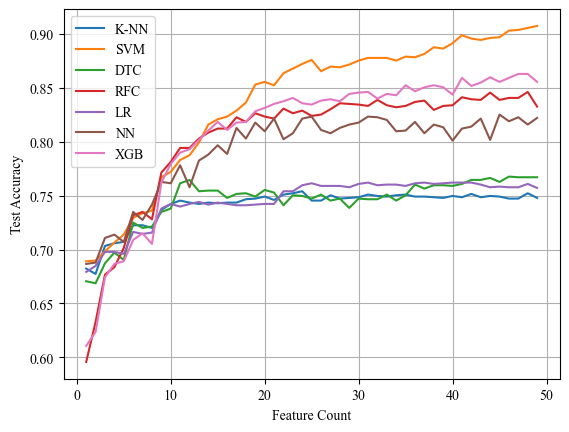

test_accuracy
['energy_mel_2']                                   K-NN       0.682324
                                                   SVM        0.689122
                                                   DTC        0.670581
                                                   RFC        0.595797
                                                   LR         0.679234
...                                                                ...
['energy_mel_2', 'mel_2', 'mel_3', 'energy_mel_... DTC        0.766996
                                                   RFC        0.832509
                                                   LR         0.757108
                                                   NN         0.822002
                                                   XGB        0.855377

[343 rows x 1 columns]

In [2]:
utils.incremental_training(dataset, channel_list=constants.SELECTED_CHANNELS, feature_subset=anova_sorted, models=constants.ALL_MODELS, mode='feature', figure=True, save=True)

## EEG Topography Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne

In [2]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from scipy import signal
import librosa as lr
import librosa.feature as lrf
from scipy.signal import welch
import pywt
from pywt import *
from scipy.signal import periodogram
#from pyemd import emd
from scipy.signal import hilbert
from scipy.stats import linregress, skew, kurtosis
from scipy.fft import fft, fftfreq

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

import nolds
from pyentrp import entropy as ent
from scipy.signal import detrend
from nolds import dfa

import constants

In [3]:
dataset_path = 'data/drowsiness-dataset.mat' # changed to relative path
data_dict = scipy.io.loadmat(dataset_path)
#subjects = list(data_dict["subindex"])
states = [i[0] for i in data_dict["substate"]]
subject = [i[0] for i in data_dict["subindex"]]
eeg = data_dict["EEGsample"]
sr = 128

In [4]:
subject_idx = {1: [0, 187],
               2: [188, 319],
               3: [320, 470],
               4: [471, 617],
               5: [618, 841],
               6: [842, 1007],
               7: [1008, 1109],
               8: [1110, 1373],
               9: [1374, 1687],
               10: [1688, 1795],
               11: [1796, 2021]} 

eeg_by_sub = {}
for sub in subject_idx:
    eeg_by_sub[sub] = eeg[subject_idx[sub][0]:subject_idx[sub][1], :, :]

In [5]:
info = mne.create_info(
    ch_names = constants.ALL_CHANNELS,
    ch_types = ['eeg']*len(constants.ALL_CHANNELS),
    sfreq=sr
)
info.set_montage('standard_1020')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,33 points
Good channels,30 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,128.00 Hz
Highpass,0.00 Hz
Lowpass,64.00 Hz


In [6]:
epochs = mne.EpochsArray(eeg, info)
epochs_sub1 = mne.EpochsArray(eeg_by_sub[1], info)

Not setting metadata
2022 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
187 matching events found
No baseline correction applied
0 projection items activated


In [8]:
epochs_sub1

Number of events,187
Events,1: 187
Time range,0.000 – 2.992 s
Baseline,off


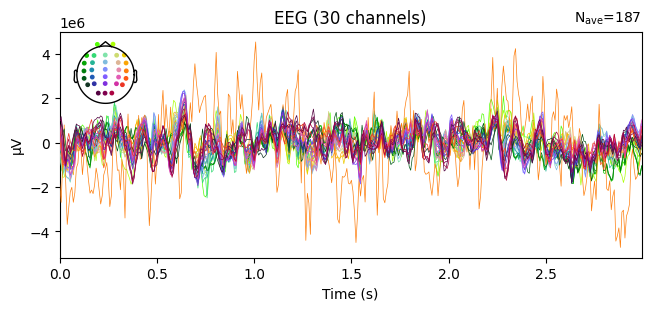

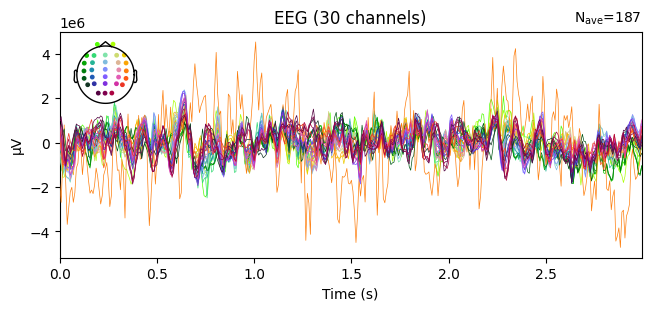

In [10]:
epochs_sub1.average().plot()

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


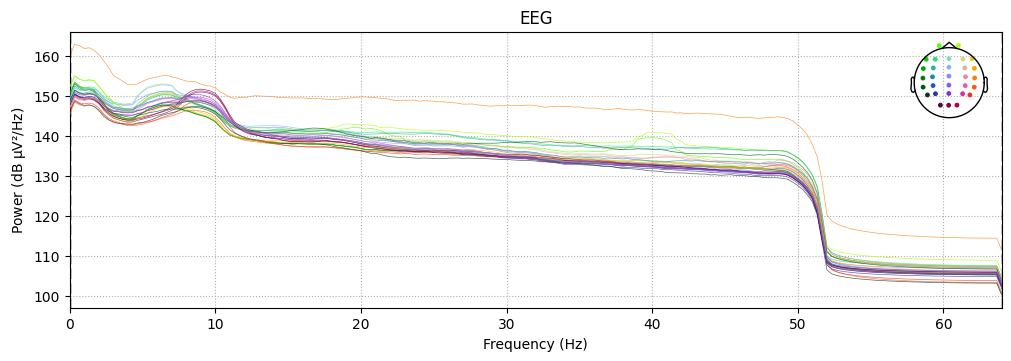

In [11]:
epochs_sub1.compute_psd().plot()

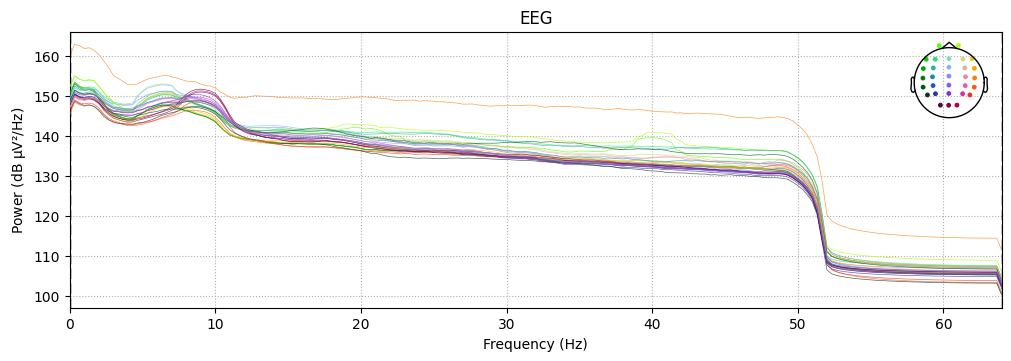

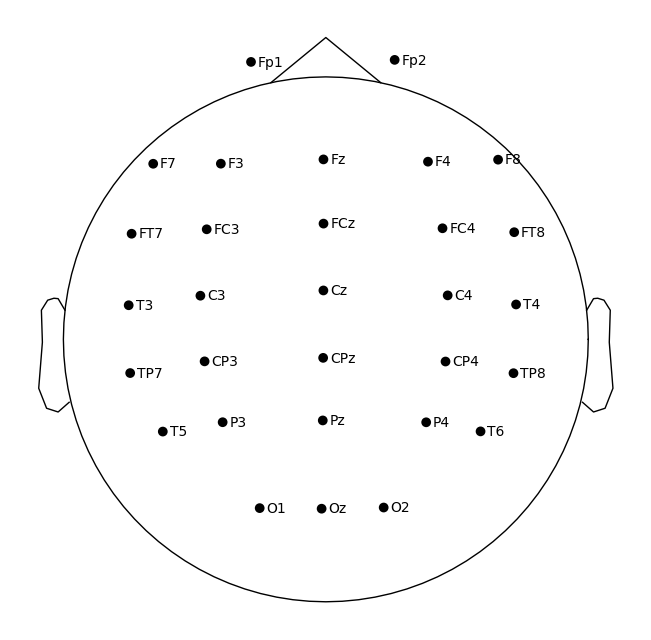

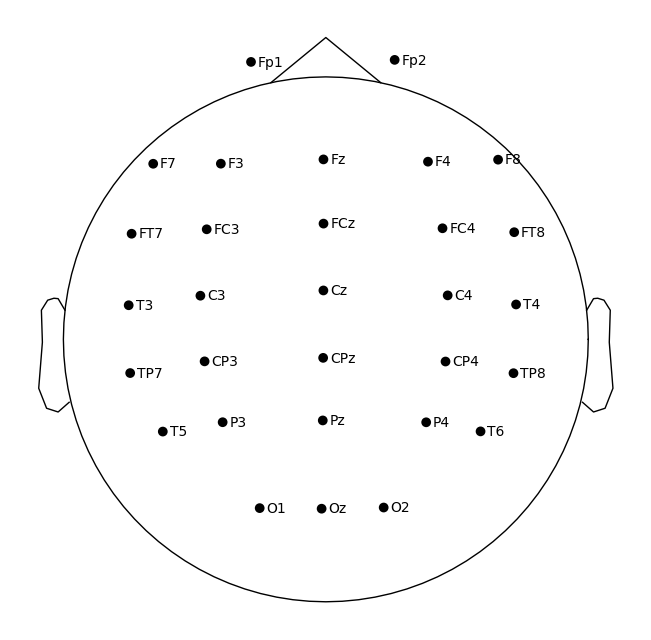

In [12]:
epochs_sub1.plot_sensors(show_names=True)

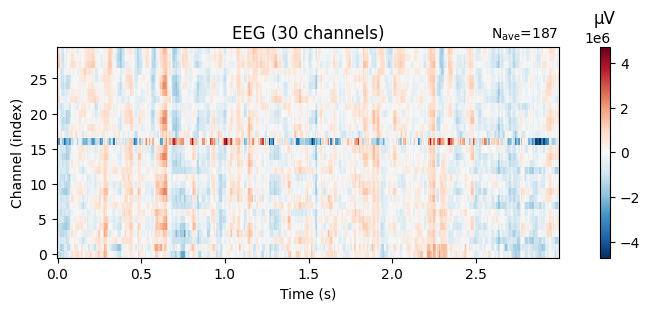

In [14]:
epochs_sub1.average().plot_image();

In [ ]:
epochs_sub1.average().compute_psd().plot_topomap()

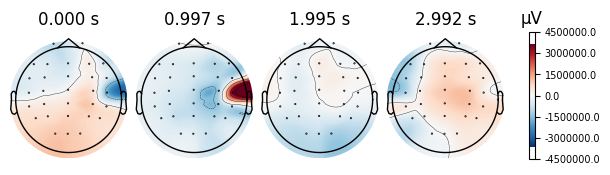

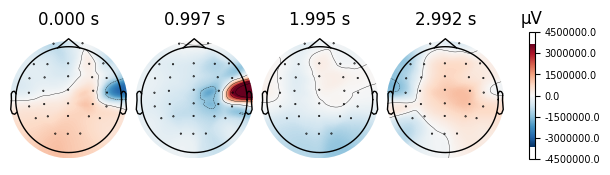

In [18]:
epochs_sub1.average().plot_topomap()

In [25]:
set = './s01_051017m.set/s01_051017m.set'
raw = mne.io.read_raw_eeglab(set)

Reading /Users/kemalcankucuk/Documents/PAWS Work/eeg-attention/s01_051017m.set/s01_051017m.fdt


In [ ]:
raw.plot()

Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


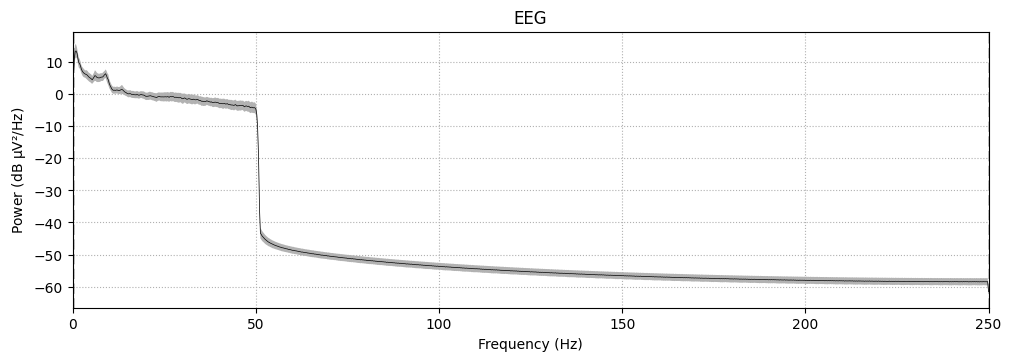

In [29]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads", amplitude=False)

## Table 1 Update

## Table 2 Update

In [12]:
feature_subsets = {}

feature_subsets['hjorth_features'] = ['activity', 'mobility', 'complexity']

feature_subsets['stat_features'] = ['skew', 'kurtosis', 'rms', 'dfa', 'mean_abs_sec_dif']

feature_subsets['time_features'] = feature_subsets['hjorth_features'] + feature_subsets['stat_features']

feature_subsets['bands'] = ['delta_power', 'theta_power',
       'alpha_power', 'beta_power', 'gamma_power', 'gamma_beta', 'gamma_alpha',
       'gamma_theta', 'gamma_delta', 'beta_alpha', 'beta_theta', 'beta_delta',
       'alpha_theta', 'alpha_delta', 'theta_delta']

feature_subsets['spec_features'] = ['spc_cnt', 'spc_roff', 'zc', 'slope']

feature_subsets['mfcc_features'] = ['mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9']

feature_subsets['mel_features'] = ['mel_0', 'mel_1', 'mel_2', 'mel_3', 'mel_4', 'mel_5'] + ['energy_mel_5','energy_mel_4', 'energy_mel_3', 'energy_mel_2', 'energy_mel_1', 'energy_mel_0']
       
feature_subsets['coeff_features'] = feature_subsets['mfcc_features'] + feature_subsets['mel_features']

feature_subsets['freq_features'] = feature_subsets['spec_features'] + feature_subsets['coeff_features']

feature_subsets['all'] = feature_subsets['freq_features'] + feature_subsets['time_features']

In [13]:
import utils, training, constants
dataset = utils.data_loader(constants.MAIN_CSV_FILE)
table2_models = ['XGB', 'K-NN']

In [16]:
subset_accs = {}
for subset in feature_subsets:
    print("+++ Procesing Subset {} +++".format(subset))
    reduced_dataset = utils.channel_selection(dataset, channel_list=constants.SELECTED_CHANNELS)
    data = utils.data_preparation(dataset=reduced_dataset, feature_subset=feature_subsets[subset])
    for model in table2_models:
        subset_accs[subset+'_'+model] = training.model_training(data, model, stats=True, cm=False)

+++ Procesing Subset hjorth_features +++

==== Stats_dict for the XGB model ====
Training Accuracy:  0.9996908809891808
Test Accuracy:  0.7262051915945612
Sensitivity (Recall): 0.7627329192546584
Precision: 0.7090069284064665
F1_score: 0.7348892878515859
AUC: 0.7263849098118309
Logloss: 9.868565173905376


==== Stats_dict for the K-NN model ====
Training Accuracy:  0.7418856259659969
Test Accuracy:  0.7360939431396786
Sensitivity (Recall): 0.7776397515527951
Precision: 0.7162471395881007
F1_score: 0.7456819535437761
AUC: 0.7362983505611453
Logloss: 9.512138440762067

+++ Procesing Subset stat_features +++

==== Stats_dict for the XGB model ====
Training Accuracy:  1.0
Test Accuracy:  0.7255871446229913
Sensitivity (Recall): 0.7503105590062111
Precision: 0.7131050767414404
F1_score: 0.7312348668280871
AUC: 0.7257087850381609
Logloss: 9.890841844726832


==== Stats_dict for the K-NN model ====
Training Accuracy:  0.7239567233384853
Test Accuracy:  0.7126081582200248
Sensitivity (Recall):